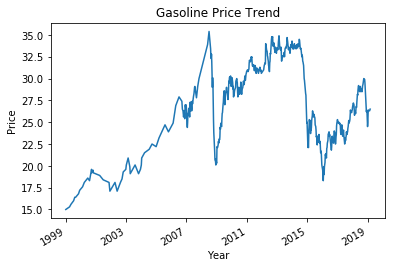

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import datetime
import matplotlib.dates as dt
from pylab import figure, show
url = 'https://web.cpc.com.tw/division/mb/oil-more4.aspx'
html = requests.get(url).text
sp = BeautifulSoup(html, 'html.parser')
data = sp.find_all('span',{'id':'Showtd'})
rows = data[0].find_all('tr')

prices = list()
for row in rows:
    cols = row.find_all('td')
    if len(cols[1].text) > 0:
        item = [dt.date2num(datetime.datetime(int((cols[0].text)[0:4]), int((cols[0].text)[5:7]), int((cols[0].text)[8:10]))) , float(cols[1].text)]
        prices.append(item)
n = []
y = []
from pylab import figure, show
for p in prices:
    n.append(p[0])
    y.append(p[1])
fig = figure()
ax = fig.add_subplot(111)
ax.plot_date(n, y, '-')
plt.title("Gasoline Price Trend")
plt.xlabel("Year")
plt.ylabel("Price")
fig.autofmt_xdate()
show()